# week - 1

In [345]:
import numpy as np
from astropy.io import fits
from time import time
from time import perf_counter
import sys
import os
from timeit import timeit
import random
import matplotlib.pyplot as plt 

# WHAT ARE PULSARS

## ABOUT THE DATASET
The Dataset contains images of a part of the sky where the location of a pulsar is confirmed. The images are in the **fits** (Flexible Image Transport System) format. We will be using the **astropy** package to open and access these fits format images. The Data is collected from the Murchison Widefield Array (**MWA**) in Australia. The Dataset is already pre-processed and is centered to the faintest the quasar signal in said image. 

### LOAD DATA
**lets get a list of the files in the directory**

In [346]:
#files = sorted(os.listdir('/Users/jesherjoshua/Downloads/pulsars_fits_11/'))
files=sorted(os.listdir('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'))
files

['0000.fits',
 '0001.fits',
 '0002.fits',
 '0003.fits',
 '0004.fits',
 '0005.fits',
 '0006.fits',
 '0007.fits',
 '0008.fits',
 '0009.fits',
 '0010.fits',
 '0011.fits',
 '0012.fits',
 '0013.fits',
 '0014.fits',
 '0015.fits',
 '0016.fits',
 '0017.fits',
 '0018.fits',
 '0019.fits',
 '0020.fits',
 '0021.fits',
 '0022.fits',
 '0023.fits',
 '0024.fits',
 '0025.fits',
 '0026.fits',
 '0027.fits',
 '0028.fits',
 '0029.fits',
 '0030.fits',
 '0031.fits',
 '0032.fits',
 '0033.fits',
 '0034.fits',
 '0035.fits',
 '0036.fits',
 '0037.fits',
 '0038.fits',
 '0039.fits',
 '0040.fits',
 '0041.fits',
 '0042.fits',
 '0043.fits',
 '0044.fits',
 '0045.fits',
 '0046.fits',
 '0047.fits',
 '0048.fits',
 '0049.fits',
 '0050.fits',
 '0051.fits',
 '0052.fits',
 '0053.fits',
 '0054.fits',
 '0055.fits',
 '0056.fits',
 '0057.fits',
 '0058.fits',
 '0059.fits',
 '0060.fits',
 '0061.fits',
 '0062.fits',
 '0063.fits',
 '0064.fits',
 '0065.fits',
 '0066.fits',
 '0067.fits',
 '0068.fits',
 '0069.fits',
 '0070.fits',
 '0071

In [347]:
type(fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/0000.fits')[0].data)

numpy.ndarray

**hmm the data is in the form of a numpy array why is that ?**

# WHY NUMPY ?
**lets find out by performing a few basic arithmetic operations**

In [348]:
lis= random.sample(range(10**5),1000)
np_array=np.array(lis)
list

[172,
 290,
 461,
 545,
 591,
 593,
 844,
 893,
 915,
 950,
 1060,
 1193,
 1473,
 1499,
 1733,
 1930,
 2167,
 2276,
 2285,
 2416,
 2423,
 2485,
 2555,
 2560,
 2781,
 2803,
 2888,
 3103,
 3429,
 3484,
 3509,
 3560,
 3614,
 3638,
 3688,
 3903,
 3919,
 4426,
 4522,
 4543,
 4545,
 4617,
 4665,
 4816,
 4865,
 4906,
 5003,
 5009,
 5012,
 5158,
 5170,
 5303,
 5304,
 5357,
 5375,
 5378,
 5632,
 5905,
 5986,
 6087,
 6094,
 6369,
 6517,
 6520,
 6522,
 6535,
 6655,
 6663,
 6697,
 6863,
 7008,
 7155,
 7285,
 7302,
 7586,
 7794,
 8181,
 9015,
 9029,
 9074,
 9134,
 9258,
 9267,
 9273,
 9331,
 9697,
 9794,
 9825,
 9845,
 9960,
 10362,
 10508,
 10632,
 10960,
 10978,
 10999,
 11054,
 11151,
 11173,
 11231,
 11294,
 11388,
 11453,
 11506,
 11580,
 11773,
 11895,
 12130,
 12237,
 12324,
 12413,
 12462,
 12539,
 12560,
 12568,
 12694,
 12881,
 13003,
 13059,
 13140,
 13284,
 13285,
 13304,
 13432,
 13559,
 13648,
 13658,
 13708,
 13715,
 13816,
 13867,
 13956,
 14200,
 14378,
 14393,
 14418,
 14556,
 147

## Mean and Median using Lists

In [349]:

s = "sum(lis)/len(lis)"

timeit(s,setup ="import random; lis= random.sample(range(10**5),1000)",number=1000)

0.002808417000778718

In [350]:

s = """n=len(lis)
mid=int(n/2)
list=sorted(lis)
if(n%2==0):
    median=(list[mid]+list[mid-1])/2
else:
    median=list[mid]"""

timeit(s,setup="import random;lis= random.sample(range(10**5),1000);",number=1000)

0.048343124999519205

## Mean and Median using numpy arrays

In [351]:

s="np.mean(lis)"

timeit(s,setup="import numpy as np; import random;lis= np.array(random.sample(range(10**5),1000))",number=1000)

0.004482124997593928

In [352]:

s = """median=np.median(lis)"""
timeit(s,setup="import numpy as np; import random;lis= np.array(random.sample(range(10**5),1000))",number=1000)


0.008861042002536124

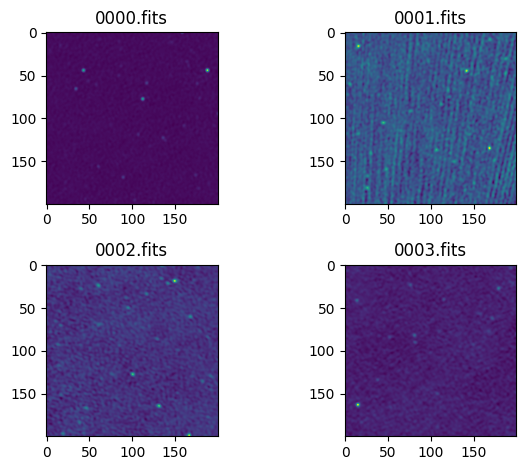

In [353]:

for i in range(4):
    fh=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i])
    data = fh[0].data
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    plt.imshow(data)
    plt.title(files[i])

# RECOGNIZING PULSARS

# MEAN STACKING TO DETECT UNDERLYING PULSARS

Time taken:  7.830956220626831


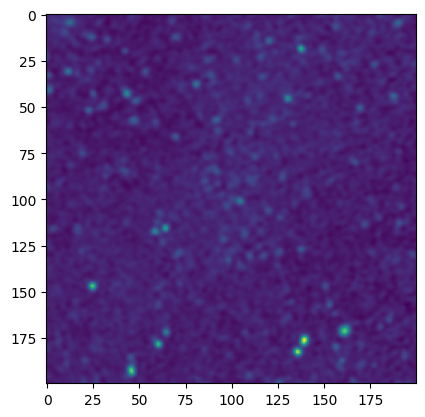

In [354]:
acc=0
start=time()
for i in range(len(files)):
    acc+=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i])[0].data
mean=acc/len(files)
end=time()-start
print('Time taken: ',end)
plt.imshow(mean)

Time taken:  2.6653428077697754


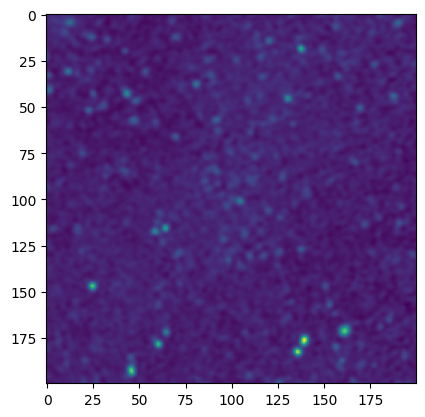

In [355]:
acc=0
start=time()
for i in range(len(files)):
    acc+=fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i])[0].data
mean=np.divide(acc,len(files))
end=time()-start
print('Time taken: ',end)
plt.imshow(mean)

Time taken:  7.738142967224121


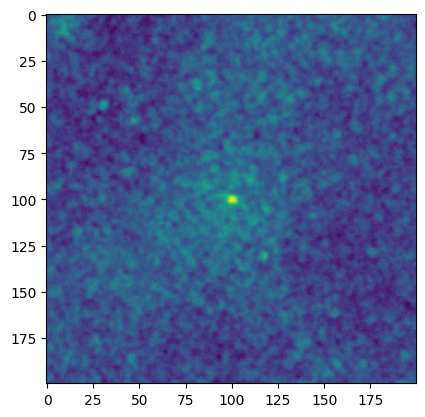

In [356]:
l=[]
start=time()
for i in range(len(files)):
    l.append(fits.open('/Users/jesherjoshua/Downloads/pulsars_fits_7330/'+files[i])[0].data)
median_stack=np.dstack(l)
median=np.median(median_stack,axis=2)
end=time()-start
print('Time taken: ',end)
plt.imshow(median)